# Imports

In [25]:
import warnings
warnings.filterwarnings("ignore")

import os

import pandas as pd
import polars as pl

# GLOBAL_VARS

In [26]:
CWD = os.getcwd()
PATH_INPUT_FOLDER = os.path.join(CWD, "input")

trip2401 = os.path.join(PATH_INPUT_FOLDER, "yellow_tripdata_2024-01.parquet")

In [27]:
pddf = pd.read_parquet(path = trip2401)
pldf = pl.read_parquet(source = trip2401)

In [28]:
pldf.shape

(2964624, 19)

In [29]:
pldf.head()

VendorID,TpepPickupDatetime,TpepDropoffDatetime,PassengerCount,TripDistance,RatecodeID,StoreAndFwdFlag,PULocationID,DOLocationID,PaymentType,FareAmount,Extra,MtaTax,TipAmount,TollsAmount,ImprovementSurcharge,TotalAmount,CongestionSurcharge,AirportFee
i64,datetime[ns],datetime[ns],f64,f64,f64,str,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,"""N""",186,79,2,17.7,1.0,0.5,0.0,0.0,1.0,22.7,2.5,0.0
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.8,1.0,"""N""",140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.7,1.0,"""N""",236,79,1,23.3,3.5,0.5,3.0,0.0,1.0,31.3,2.5,0.0
1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.4,1.0,"""N""",79,211,1,10.0,3.5,0.5,2.0,0.0,1.0,17.0,2.5,0.0
1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.8,1.0,"""N""",211,148,1,7.9,3.5,0.5,3.2,0.0,1.0,16.1,2.5,0.0


<Axes: xlabel='VendorID'>

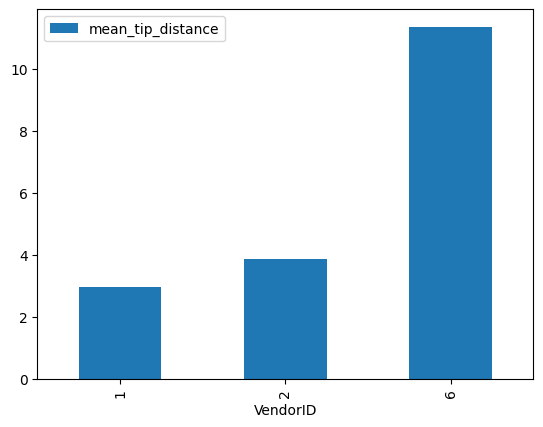

In [34]:
(
    pddf
    .groupby(by = ["VendorID"])
    .agg(
        max_passenger_count = ("PassengerCount", max),
        min_passenger_count = ("PassengerCount", min),
        mean_tip_distance = ("TripDistance", "mean")
    )
    .reset_index()
    .sort_values("VendorID")
    [["VendorID", "mean_tip_distance"]]
    .plot(kind = "bar", x = "VendorID")
)

In [33]:
(
    pldf
    .group_by(by = ["VendorID"])
    .agg(
        max_passenger_count = pl.col("PassengerCount").max(),
        min_passenger_count = pl.col("PassengerCount").min(),
        mean_tip_distance = pl.col("TripDistance").mean()
    )
    .sort("VendorID")
    .select(pl.col(["VendorID", "mean_tip_distance"]))
    .plot(kind = "bar", x = "VendorID")
)

:Bars   [VendorID]   (mean_tip_distance)

In [32]:
# pldf = pl.read_parquet(source = f"{PATH_INPUT_FOLDER}/yellow_tripdata_*.parquet")